December 17th notes

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

In [143]:
# House sale price = b1*(size of house) + b0
# b1 is the slope 
# b0 is the y 

# want to predict the b1 and b0 that minimizes the distance between the line and data points

In [144]:
# Configure our outputs to be pandas dataframes
set_config(transform_output="pandas")

In [145]:
# load in dataset
sacramento = pd.read_csv("01_materials/notebooks/dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


In [146]:
sacramento_train, sacramento_test = train_test_split(sacramento, train_size=0.75, random_state=123)

In [147]:
# Step 1. Define our predictor and response variable
X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [148]:
# Step 2. Initialize a linear regression
lm = LinearRegression()

In [149]:
# Step 3. Fit model to our data 
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [150]:
lm.coef_ #slope of the line, the b1

array([138.86770278])

In [151]:
lm.intercept_ #the y intercept, the b0

np.float64(11444.504059827683)

In [152]:
# Make predictions on the test set 
sacramento_test["predicted"] = lm.predict(sacramento_test[["sq__ft"]])

In [153]:
# Calculate RMSPE (diff between our actual price and predicted price)
mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)**(1/2)

85124.5822447713

In [154]:
# Calculate r2
r2_score(
    y_true=sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)

0.5042313343551887

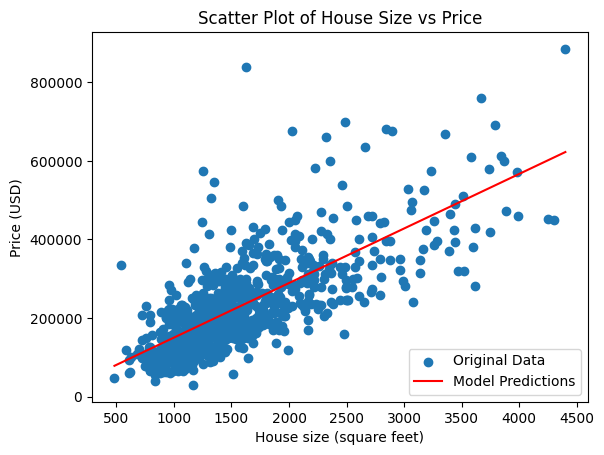

In [155]:
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

In [156]:
# If we change the random state, then we get a slight shift in b1, b0. 
# So best practice is to perform x-fold cross validation

In [157]:
returned_dictionary = cross_validate(
    estimator=lm,
    cv=5,
    X=sacramento[["sq__ft"]],
    y = sacramento["price"],
    scoring="neg_root_mean_squared_error" #r2
)

In [158]:
cv_5_df = pd.DataFrame(returned_dictionary)
cv_5_df

,fit_time,score_time,test_score
0,0.001240,0.000644,-81369.919847
1,0.000573,0.000373,-97590.236340
2,0.000490,0.000341,-61790.733828
3,0.000472,0.000328,-92026.283010
4,0.000461,0.000324,-75474.947490


In [159]:
cv_5_df["df_test_score"] = cv_5_df["test_score"].abs()
cv_5_df

,fit_time,score_time,test_score,df_test_score
0,0.001240,0.000644,-81369.919847,81369.919847
1,0.000573,0.000373,-97590.236340,97590.236340
2,0.000490,0.000341,-61790.733828,61790.733828
3,0.000472,0.000328,-92026.283010,92026.283010
4,0.000461,0.000324,-75474.947490,75474.947490


In [160]:
cv_5_df.agg(["mean","sem"])

,fit_time,score_time,test_score,df_test_score
mean,0.000647,0.000402,-81650.424103,81650.424103
sem,0.000149,0.000061,6302.216095,6302.216095


In [161]:
# multivariable linear regression use both sq ft and number of bedrooms 

mlm = LinearRegression()

returned_dictionary2 = cross_validate(
    estimator=mlm,
    cv=5,
    X=sacramento[["sq__ft"]],
    y=sacramento["price"],
    scoring = "r2"
)

In [162]:
cv_5_df_mlm = pd.DataFrame(returned_dictionary2)
cv_5_df_mlm.agg(["mean","sem"])

,fit_time,score_time,test_score
mean,0.002699,0.000842,0.507727
sem,0.001777,0.000263,0.020646


In [164]:
mlm.fit(sacramento[["sq__ft", "beds"]], sacramento["price"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [165]:
mlm.coef_

array([   156.23291179, -22894.49430778])

In [166]:
mlm.intercept_

np.float64(56239.192229688924)